### INTRODU√á√ÉO

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# Splits / resampling
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    cross_validate
)

# Metrics
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Models
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Feature selection
from sklearn.feature_selection import f_classif

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample  # for bootstrap

# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Reproducibility
rng = np.random.default_rng(42)
pd.set_option("display.max_columns", 200)


In [2]:
df = pd.read_csv("dataset.csv")

display(df.head())

df.info()
print("Shape:", df.shape, "| Duplicates:", df.duplicated().sum())

# Basic splits
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("Numeric columns:", len(num_cols))
print("Categorical columns:", cat_cols)

# Check class balance (important for classification task)
print("Class distribution:")
print(df['target_class'].value_counts())


duration_1  duration_2  duration_3  duration_4  duration_5  loudness_level  \
0         0.0         0.0         0.0         1.0         0.0             2.0   
1         0.0         0.0         1.0         0.0         0.0             3.0   
2         0.0         0.0         0.0         1.0         0.0             0.0   
3         0.0         1.0         0.0         0.0         0.0             1.0   
4         0.0         0.0         1.0         0.0         0.0             1.0   

   popularity_level  tempo_class  time_signature  key_mode  artist_song_count  \
0               4.0          2.0        0.221824 -1.511882           3.055348   
1               4.0          1.0        0.221824  1.330170           0.747117   
2               4.0          1.0        0.221824 -1.483743           3.752626   
3               0.0          1.0        0.221824  0.204605          -0.406998   
4               4.0          1.0        0.221824  1.583423          -0.238689   

   album_freq  movement_index  intensity_level  verbal_density  purity_score  \
0    0.465097       -0.592367        -0.215943       -0.558508     -0.538032   
1   -0.088815        0.260452         1.083433       -0.482845     -0.798166   
2   -0.429684        0.790583         0.463670       -0.351381     -0.698623   
3   -0.387075        1.228517         0.147723        0.004234      0.421307   
4   -0.472292        0.600427         0.262052       -0.380700     -0.501944   

   positivity_index  activity_rate  loudness_intensity  happy_dance  \
0          0.019031      -1.821983            0.231595    -0.342805   
1         -0.293396       0.063556            1.096193    -0.235202   
2          1.353599       0.595310           -0.206955     1.466782   
3          1.210885       0.062022            0.464803     1.637574   
4          0.076888      -0.006161           -0.179153     0.208423   

   acoustics_instrumental  artists_avg_popularity  tempo_vs_genre  \
0               -0.291004                1.174469       -2.050394   
1               -0.301833                2.232929       -0.079104   
2               -0.306003               -0.124485        0.476833   
3               -0.305989                1.480086       -0.080708   
4               -0.306278               -1.136754       -0.151992   

   energy_rank_pct  loud_energy_ratio  mood_pca  mood_cluster  \
0        -1.035640          -0.009063 -0.526052     -0.107785   
1         0.618424          -0.009369  0.171172     -0.775793   
2         0.562618          -0.009394  1.333943      1.562236   
3        -0.903516          -0.009104  0.686433     -0.775793   
4        -0.056277          -0.009326  0.225546      1.228232   

   acoustic_valence_mood_cluster  explicit  signal_strength  mode_indicator  \
0                       1.384717       0.0            0.417             0.0   
1                       0.396063       0.0            0.807             1.0   
2                       0.725614       0.0            0.797             1.0   
3                      -1.251692       0.0            0.460             1.0   
4                       1.384717       0.0            0.673             0.0   

  focus_factor  ambient_level       key_sin   key_cos  duration_log  \
0        0.022         0.0974  0.000000e+00  1.000000      1.402643   
1       0.0177         0.1010 -8.660254e-01  0.500000      1.610770   
2     0.000745         0.0546  0.000000e+00  1.000000      1.245523   
3     0.000141         0.0610  1.224647e-16 -1.000000      1.756630   
4     5.29e-05         0.3040 -5.000000e-01  0.866025      1.601809   

   duration_log_z  time_signature_class_boolean  loudness_yeo  \
0       -0.418639                           1.0     -0.462119   
1        0.299746                           1.0      1.547522   
2       -0.960967                           1.0      0.359507   
3        0.803206                           1.0     -0.061056   
4        0.268814                           1.0      0.081898   

   is_instrumental  is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration_1                     3000 non-null   float64
 1   duration_2                     3000 non-null   float64
 2   duration_3                     3000 non-null   float64
 3   duration_4                     3000 non-null   float64
 4   duration_5                     3000 non-null   float64
 5   loudness_level                 3000 non-null   float64
 6   popularity_level               3000 non-null   float64
 7   tempo_class                    3000 non-null   float64
 8   time_signature                 3000 non-null   float64
 9   key_mode                       3000 non-null   float64
 10  artist_song_count              3000 non-null   float64
 11  album_freq                     3000 non-null   float64
 12  movement_index                 3000 non-null   f

### DATA CLEANING

In [3]:
# Start a modeling copy (will be used later for regression/classification)
df_model = df.copy()

# Outlier winsorization per class, per numeric feature (except targets)
num_features = [
    c for c in df_model.select_dtypes(include=[np.number]).columns
    if c not in ['target_regression']
]

for feature in num_features:
    for cls in df_model['target_class'].unique():
        subset = df_model[df_model['target_class'] == cls][feature]

        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        mask = df_model['target_class'] == cls
        df_model.loc[mask, feature] = np.clip(
            df_model.loc[mask, feature],
            lower,
            upper
        )

print("df_model shape after winsorization:", df_model.shape)


df_model shape after winsorization: (3000, 49)


Numeric summary:


count      mean       std  min  25%  50%  75%  max
duration_1  3000.0  0.098667  0.298264  0.0  0.0  0.0  0.0  1.0
duration_2  3000.0  0.180000  0.384252  0.0  0.0  0.0  0.0  1.0
duration_3  3000.0  0.298667  0.457750  0.0  0.0  0.0  1.0  1.0
duration_4  3000.0  0.376000  0.484461  0.0  0.0  0.0  1.0  1.0
duration_5  3000.0  0.046667  0.210959  0.0  0.0  0.0  0.0  1.0

Categorical summary:


count unique       top  freq
focus_factor  3000   1221       0.0   982
target_class  3000      3  class_93  1000

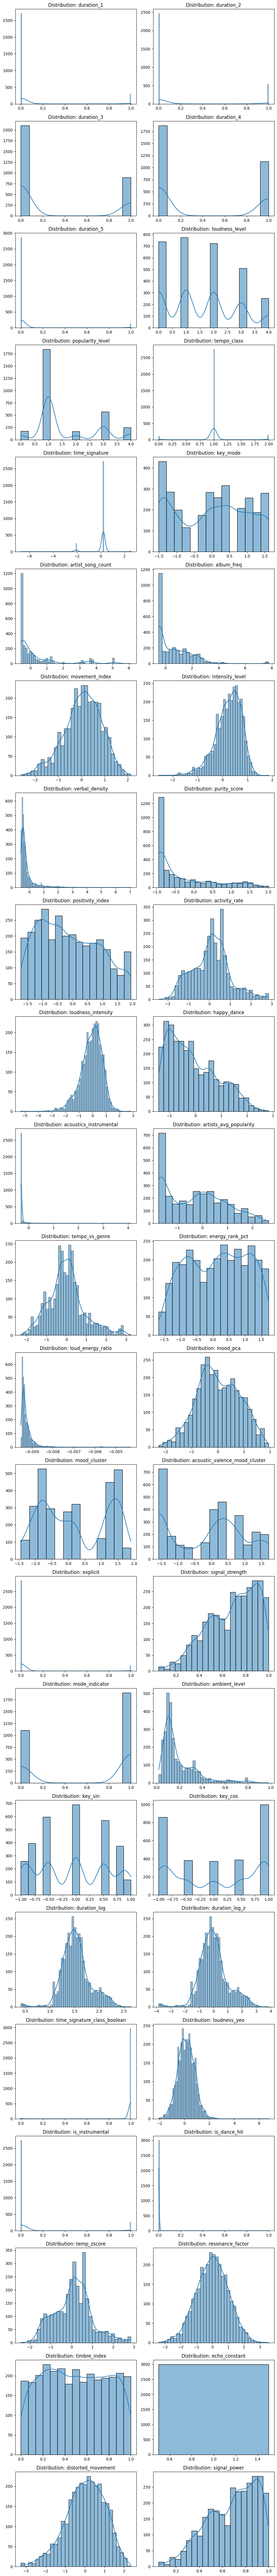

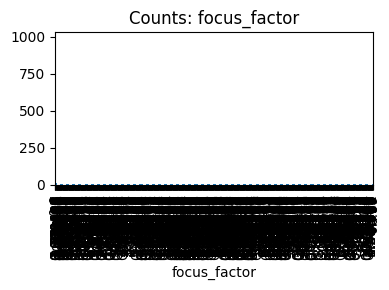

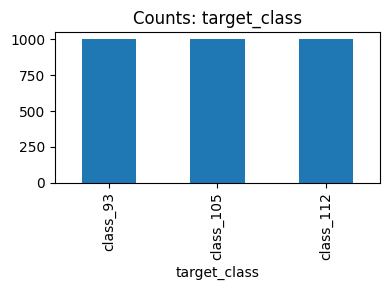

In [4]:
# Descriptive statistics (raw df)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

desc_num = df[num_cols].describe().T
desc_cat = df[cat_cols].describe().T

print("Numeric summary:")
display(desc_num.head())

print("Categorical summary:")
display(desc_cat)

# === Numeric distributions ===
num_features = [c for c in num_cols if c != 'target_regression']

n_cols = 2
n_rows = math.ceil(len(num_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution: {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplots if any
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# === Categorical distributions ===
for col in cat_cols:
    plt.figure(figsize=(4,3))
    df[col].value_counts(dropna=False).plot.bar()
    plt.title(f"Counts: {col}")
    plt.tight_layout()
    plt.show()


### UNIVARIATE ANALYSIS

Target Variables Distribution


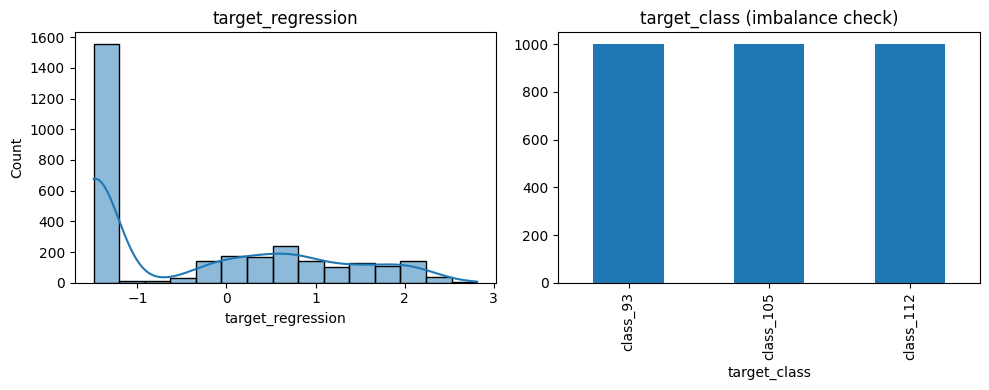

In [5]:
print("Target Variables Distribution")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['target_regression'].dropna(), kde=True, ax=axes[0])
axes[0].set_title("target_regression")

df['target_class'].value_counts().plot.bar(ax=axes[1])
axes[1].set_title("target_class (imbalance check)")

plt.tight_layout()
plt.show()


### BIVARIATE ANALYSIS

Correla√ß√£o com target_regression
target_regression                                      1.000000
artists_avg_popularity                                 0.804786
popularity_level                                       0.640606
duration_log                                           0.153175
duration_log_z                                         0.153175
energy_rank_pct                                        0.143358
signal_power                                           0.136441
signal_strength                                        0.136441
explicit                                               0.109541
is_instrumental                                        0.102334
verbal_density                                         0.098197
time_signature                                         0.088742
loudness_yeo                                           0.083701
duration_1                                             0.083623
intensity_level                                        0.077402
acoustics_instrumental                                 0.076068
duration_5                                             0.074478
movement_index                                         0.073590
duration_3                                             0.054624
tempo_class                                            0.044131
key_mode                                               0.030032
is_dance_hit                                           0.026513
ambient_level                                          0.022794
temp_zscore                                            0.019978
activity_rate                                          0.019978
key_sin                                                0.014923
mood_cluster                                           0.012707
resonance_factor                                       0.007397
duration_2                                             0.003898
distorted_movement                                     0.002786
timbre_index                                          -0.014423
key_cos                                               -0.033870
loudness_level                                        -0.034294
time_signature_class_boolean                          -0.040967
tempo_vs_genre                                        -0.046656
loudness_intensity                                    -0.064351
loud_energy_ratio                                     -0.099410
acoustic_valence_mood_cluster                         -0.109147
mood_pca                                              -0.131714
duration_4                                            -0.138619
mode_indicator                                        -0.171697
purity_score                                          -0.185587
happy_dance                                           -0.199947
positivity_index                                      -0.264200
artist_song_count                                     -0.268496
album_freq                                            -0.622507
echo_constant                                               NaN

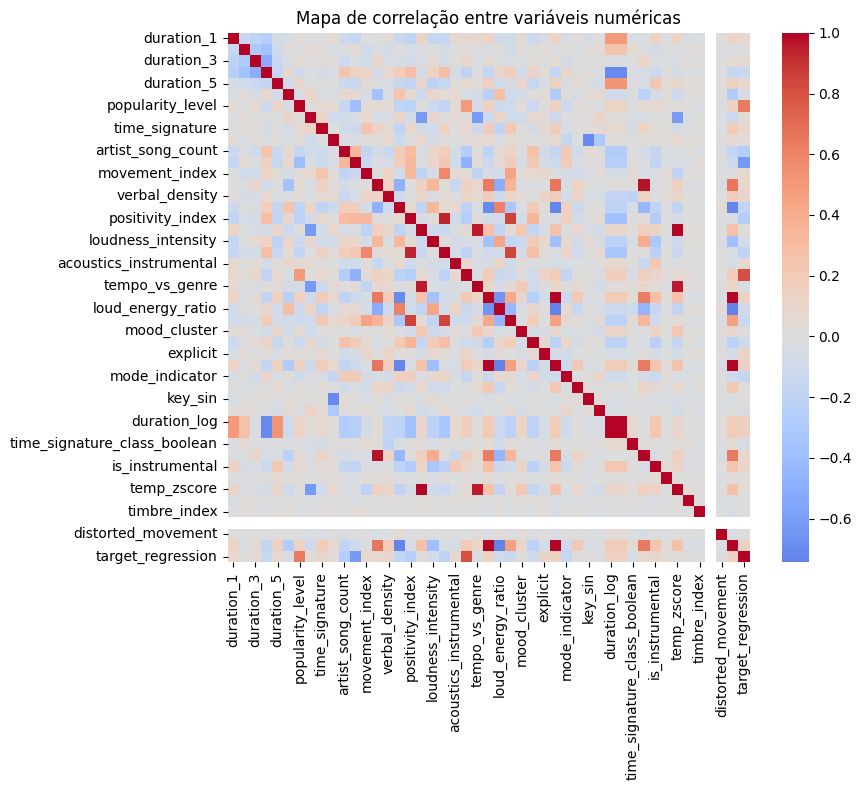

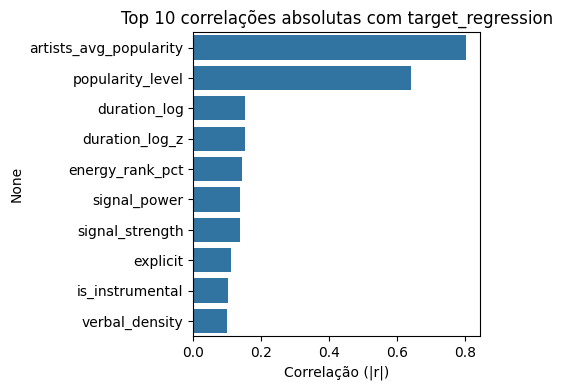

In [6]:
# Compute correlation of all numeric variables with the regression target
corr_matrix = df[num_cols].corr(numeric_only=True)
corr_with_target = corr_matrix['target_regression'].sort_values(ascending=False)

# Display correlation values
display(corr_with_target.to_frame("Correla√ß√£o com target_regression"))

# Plot heatmap (for overall context)
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Mapa de correla√ß√£o entre vari√°veis num√©ricas")
plt.tight_layout()
plt.show()

# Plot top correlations with regression target
top_corr = corr_with_target.drop('target_regression').abs().head(10)
plt.figure(figsize=(5, 4))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 correla√ß√µes absolutas com target_regression")
plt.xlabel("Correla√ß√£o (|r|)")
plt.tight_layout()
plt.show()


In [7]:
# Encode class labels numerically for ANOVA
cls_map = {label: i for i, label in enumerate(sorted(df['target_class'].unique()))}
y_class = df['target_class'].map(cls_map)

# Numeric predictors only (exclude regression target)
X_num = df.select_dtypes(include=[np.number]).drop(
    columns=['target_regression'],
    errors='ignore'
)

# ANOVA F-scores per feature for class discrimination
f_vals, p_vals = f_classif(X_num, y_class)

anova_df = pd.DataFrame({
    'Feature': X_num.columns,
    'F_value': f_vals,
    'p_value': p_vals
}).sort_values('F_value', ascending=False)

display(anova_df.head(10))


Feature     F_value        p_value
23                energy_rank_pct  907.456210  7.277622e-309
29                signal_strength  831.128531  6.959070e-288
45                   signal_power  831.128531  6.959070e-288
15                   purity_score  690.694594  2.020746e-247
16               positivity_index  407.010163  4.214526e-157
11                     album_freq  391.311379  1.019938e-151
38                is_instrumental  310.592061  2.611109e-123
24              loud_energy_ratio  268.380145  6.050774e-108
27  acoustic_valence_mood_cluster  265.502511  6.959630e-107
19                    happy_dance  256.422277  1.589250e-103

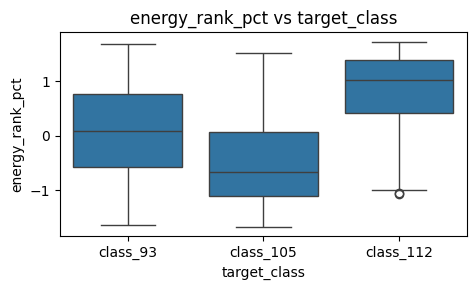

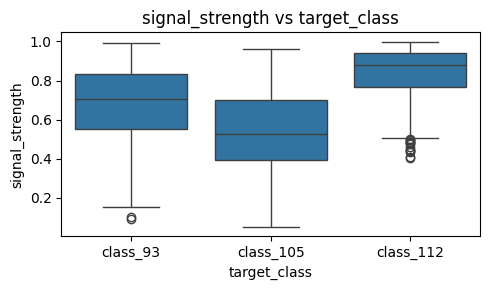

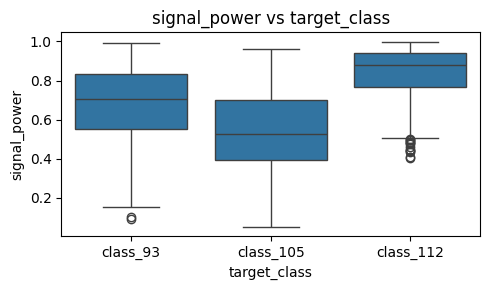

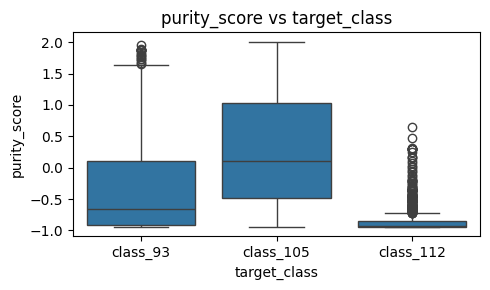

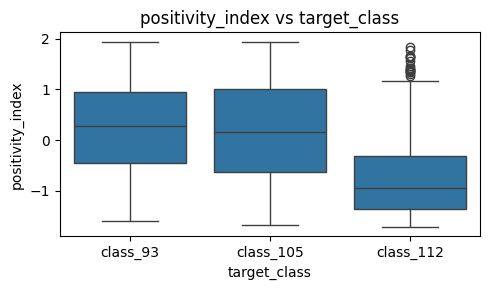

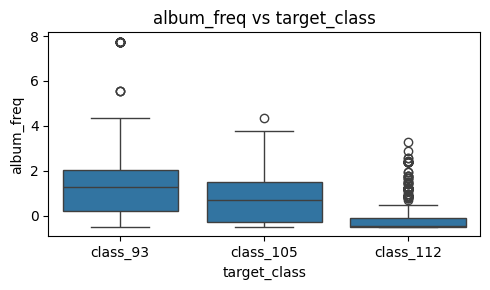

In [8]:
top_features = anova_df['Feature'].head(6).tolist()

for feature in top_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='target_class', y=feature, data=df)
    plt.title(f"{feature} vs target_class")
    plt.tight_layout()
    plt.show()


In [9]:
outlier_info_target = []

for feature in top_features:
    for cls in df['target_class'].unique():
        # Subconjunto da classe atual
        subset = df[df['target_class'] == cls][feature]

        # Quartis e IQR
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1

        # Limites inferior e superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        perc_outliers = len(outliers) / len(subset) * 100

        outlier_info_target.append({
            "Feature": feature,
            "Classe": cls,
            "N¬∫ Outliers": len(outliers),
            "Percentagem (%)": round(perc_outliers, 2)
        })

# Criar DataFrame
outlier_by_class_df = pd.DataFrame(outlier_info_target)

# Pivotar para visualiza√ß√£o (features nas linhas, classes nas colunas)
outlier_summary = outlier_by_class_df.pivot(index="Feature", columns="Classe", values="Percentagem (%)")

# Mostrar tabela com gradiente azul
display(outlier_summary.style.background_gradient(cmap="Blues").format("{:.2f} %"))


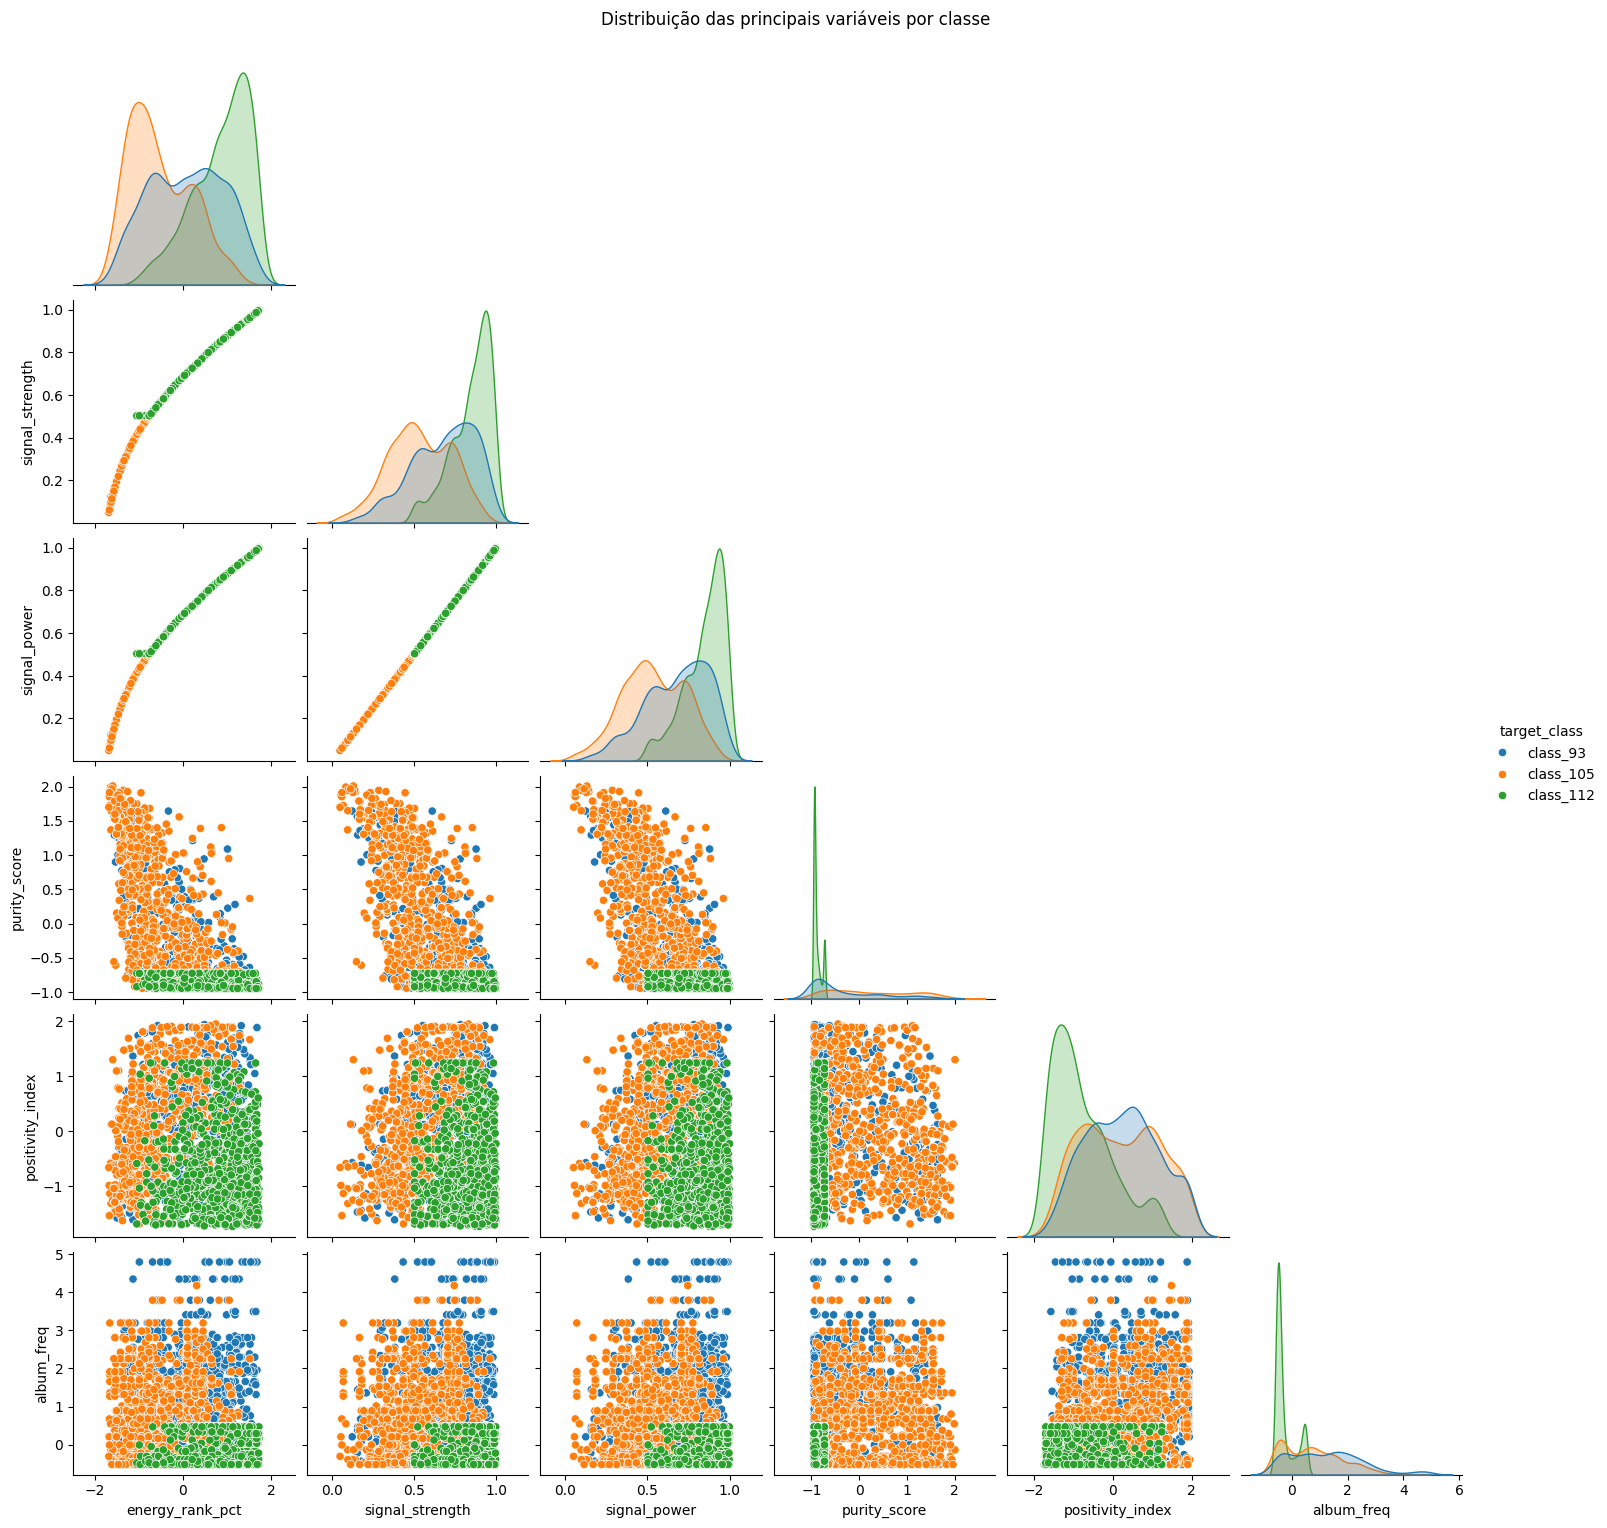

In [10]:
sns.pairplot(
    df_model,
    vars=top_features[:6],
    hue='target_class',
    corner=True
)
plt.suptitle("Distribui√ß√£o das principais vari√°veis por classe", y=1.02)
plt.show()


### Multicollinearity Analysis

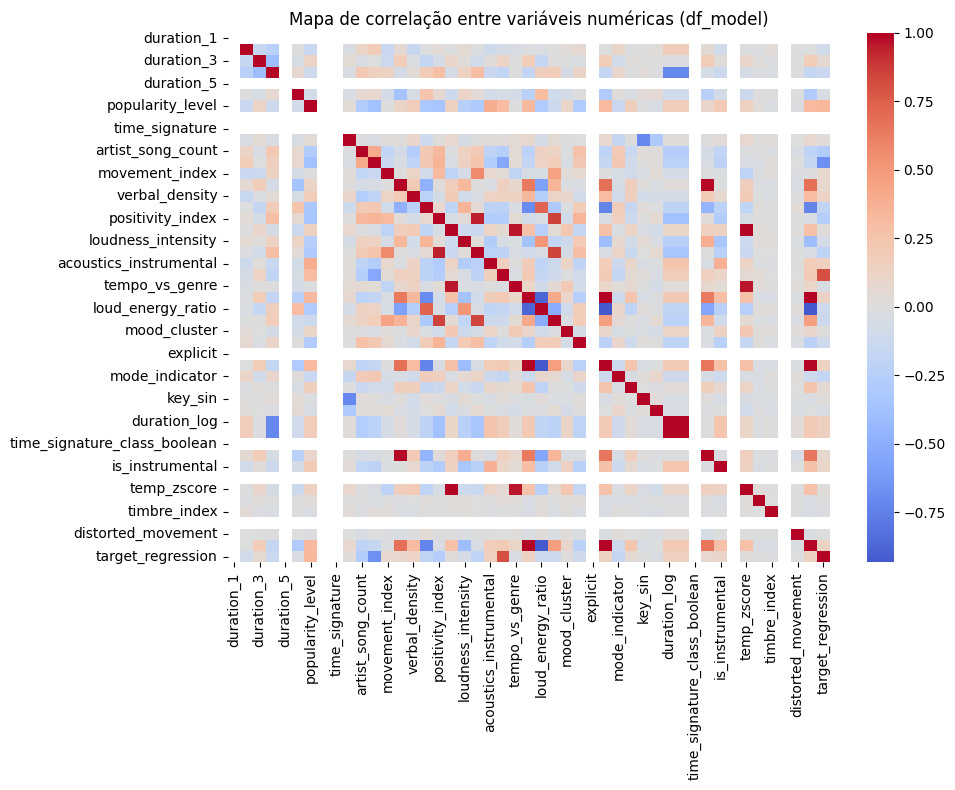

In [11]:
num_cols_model = df_model.select_dtypes(include=[np.number]).columns.tolist()
corr = df_model[num_cols_model].corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Mapa de correla√ß√£o entre vari√°veis num√©ricas (df_model)")
plt.tight_layout()
plt.show()


In [12]:
high_corr_pairs = (
    corr.abs()
    .unstack()
    .reset_index()
    .rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'})
    .query("Feature_1 != Feature_2 and Correlation > 0.8")
    .sort_values(by='Correlation', ascending=False)
)
high_corr_pairs = high_corr_pairs[
    high_corr_pairs.apply(lambda x: x['Feature_1'] < x['Feature_2'], axis=1)
].reset_index(drop=True)

display(high_corr_pairs)


Feature_1          Feature_2  Correlation
0             duration_log     duration_log_z     1.000000
1            activity_rate        temp_zscore     1.000000
2             signal_power    signal_strength     1.000000
3          energy_rank_pct    signal_strength     0.986471
4          energy_rank_pct       signal_power     0.986471
5          intensity_level       loudness_yeo     0.984292
6            activity_rate     tempo_vs_genre     0.956239
7              temp_zscore     tempo_vs_genre     0.956239
8              happy_dance   positivity_index     0.940358
9        loud_energy_ratio    signal_strength     0.933726
10       loud_energy_ratio       signal_power     0.933726
11         energy_rank_pct  loud_energy_ratio     0.873823
12                mood_pca   positivity_index     0.849809
13             happy_dance           mood_pca     0.845586
14  artists_avg_popularity  target_regression     0.804888

In [13]:
X_vif = (
    df_model
    .select_dtypes(include=[np.number])
    .drop(columns=['target_regression'], errors='ignore')
    .fillna(0)
)

X_vif_const = add_constant(X_vif)

vif_data = pd.DataFrame({
    "Feature": X_vif_const.columns,
    "VIF": [
        variance_inflation_factor(X_vif_const.values, i)
        for i in range(X_vif_const.shape[1])
    ]
})

# Remove constant and sort
vif_data = vif_data[vif_data["Feature"] != "const"].sort_values("VIF", ascending=False)
display(vif_data.head(20))


Feature          VIF
35      duration_log_z          inf
17       activity_rate          inf
45        signal_power          inf
34        duration_log          inf
29     signal_strength          inf
40         temp_zscore          inf
25            mood_pca  3802.387023
16    positivity_index  2549.714490
23     energy_rank_pct   285.637569
12      movement_index   143.615083
37        loudness_yeo   134.772865
13     intensity_level    86.514767
19         happy_dance    35.963133
24   loud_energy_ratio    34.659700
18  loudness_intensity    32.034840
22      tempo_vs_genre    31.533297
3           duration_4     4.185859
15        purity_score     2.737830
9             key_mode     2.619783
5       loudness_level     2.432451

In [14]:
to_drop = [
    # duration & derived variables (highly redundant between them)
    'duration_1','duration_2','duration_3','duration_4','duration_5','duration_log_z',
    # strong collinearity / standardised versions
    'temp_zscore','activity_rate','movement_index','positivity_index','mood_pca',
    # redundant energy/signal style metrics
    'signal_power','energy_rank_pct','loudness_yeo','happy_dance'
]

df_clean = df_model.drop(columns=[c for c in to_drop if c in df_model.columns]).copy()

print("Remaining columns:", df_clean.shape[1])
print("Dropped:", len([c for c in to_drop if c in df_model.columns]), "columns")


Remaining columns: 34
Dropped: 15 columns


In [15]:
# Get numeric columns safely
num_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()

X_vif2 = (
    df_clean[num_cols_clean]
    .drop(columns=['target_regression'], errors='ignore')
    .fillna(0)
)

X_vif2_const = add_constant(X_vif2)

vif_df2 = pd.DataFrame({
    'Feature': X_vif2_const.columns,
    'VIF': [
        variance_inflation_factor(X_vif2_const.values, i)
        for i in range(X_vif2_const.shape[1])
    ]
})

# Remove the constant term and sort
vif_df2 = vif_df2[vif_df2['Feature'] != 'const'].sort_values('VIF', ascending=False)
display(vif_df2.head(15))


Feature        VIF
7          intensity_level  16.163435
18         signal_strength  14.933525
14       loud_energy_ratio  14.086774
10      loudness_intensity  11.732768
4                 key_mode   2.595319
9             purity_score   2.502155
21                 key_sin   2.287514
6               album_freq   1.765356
0           loudness_level   1.573924
1         popularity_level   1.501698
12  artists_avg_popularity   1.492345
5        artist_song_count   1.426209
11  acoustics_instrumental   1.413506
25         is_instrumental   1.387763
8           verbal_density   1.301079

### Regression Modeling

In [16]:
# Separate predictors (numerical only) and regression target
features_reg = [
    c for c in df_clean.columns
    if c not in ['target_regression', 'target_class', 'focus_factor']
]

X = df_clean[features_reg].select_dtypes(include=[np.number]).copy()
y = df_clean['target_regression'].astype(float).copy()

# Train/test split (Holdout)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Impute missing numeric values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)
X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)


In [17]:
results_simple = []
for col in X.columns:
    lr = LinearRegression()
    lr.fit(X_train[[col]], y_train)
    y_pred = lr.predict(X_test[[col]])
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   
    results_simple.append((col, r2, mae, rmse))

simple_df = pd.DataFrame(results_simple, columns=['Feature','R2','MAE','RMSE'])
simple_df = simple_df.sort_values('R2', ascending=False)
display(simple_df.head(10))

best_feature = simple_df.iloc[0]['Feature']
print("Best feature for Simple LR:", best_feature)


Feature        R2       MAE      RMSE
12         artists_avg_popularity  0.676296  0.457400  0.724060
6                      album_freq  0.461701  0.759602  0.933710
1                popularity_level  0.084257  1.015469  1.217832
5               artist_song_count  0.075577  1.033129  1.223590
19                 mode_indicator  0.051067  1.119669  1.239705
9                    purity_score  0.036573  1.101622  1.249137
23                   duration_log  0.021549  1.130940  1.258839
11         acoustics_instrumental  0.019194  1.132436  1.260353
18                signal_strength  0.015896  1.126565  1.262470
16  acoustic_valence_mood_cluster  0.009389  1.133894  1.266637

Best feature for Simple LR: artists_avg_popularity


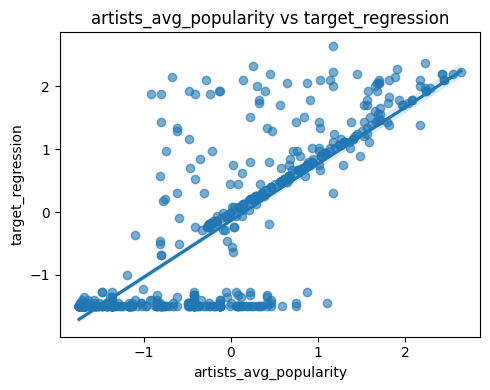

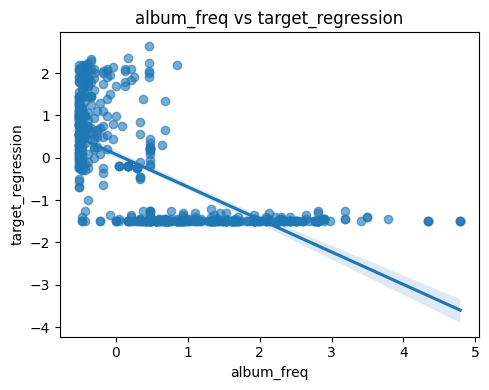

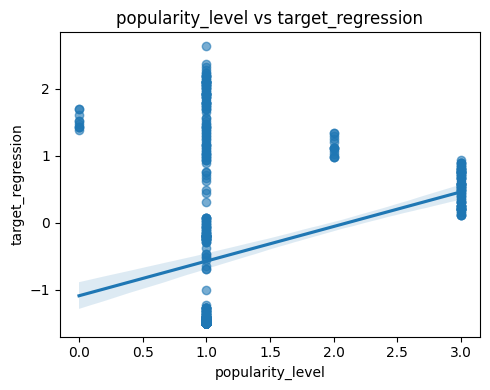

In [18]:
top3 = simple_df.head(3)['Feature'].tolist()

for feat in top3:
    plt.figure(figsize=(5,4))
    sns.regplot(x=X_test[feat], y=y_test, scatter_kws={'alpha':0.6})
    plt.title(f"{feat} vs target_regression")
    plt.xlabel(feat)
    plt.ylabel("target_regression")
    plt.tight_layout()
    plt.show()


### Multiple Linear Regression

In [19]:
# Correlation with regression target
corr_with_y = df_clean.corr(numeric_only=True)['target_regression'].sort_values(ascending=False)
corr_with_y

target_regression                1.000000
artists_avg_popularity           0.804888
popularity_level                 0.328509
acoustics_instrumental           0.158513
duration_log                     0.152945
signal_strength                  0.137288
verbal_density                   0.130489
is_instrumental                  0.106829
intensity_level                  0.083210
ambient_level                    0.056750
key_mode                         0.030032
key_sin                          0.014923
mood_cluster                     0.012707
resonance_factor                 0.007864
distorted_movement               0.002554
timbre_index                    -0.014423
key_cos                         -0.033870
loudness_level                  -0.034294
tempo_vs_genre                  -0.046623
loudness_intensity              -0.067132
acoustic_valence_mood_cluster   -0.109147
loud_energy_ratio               -0.115268
mode_indicator                  -0.171697
purity_score                    -0

In [20]:
# Get top correlated features (excluding the target)
top3 = corr_with_y.drop('target_regression', errors='ignore').abs().head(3).index.tolist()
top5 = corr_with_y.drop('target_regression', errors='ignore').abs().head(5).index.tolist()
top4 = corr_with_y.drop('target_regression', errors='ignore').abs().head(4).index.tolist()
top10 = corr_with_y.drop('target_regression', errors='ignore').abs().head(10).index.tolist()
top5_no4 = [top10[i] for i in [0, 1, 2, 4]]

print("Top 5 features:", top5)
print("Top 10 features:", top10)

Top 5 features: ['artists_avg_popularity', 'popularity_level', 'acoustics_instrumental', 'duration_log', 'signal_strength']
Top 10 features: ['artists_avg_popularity', 'popularity_level', 'acoustics_instrumental', 'duration_log', 'signal_strength', 'verbal_density', 'is_instrumental', 'intensity_level', 'ambient_level', 'key_mode']


In [21]:
def eval_lr(cols, name):
    lr = LinearRegression()
    lr.fit(X_train[cols], y_train)
    y_pred = lr.predict(X_test[cols])
    return {
        'Model': name,
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'Features': cols
    
    }

In [22]:
models_reg = [
    eval_lr([best_feature], "best feature"),     # simple model (baseline)
    eval_lr(top3, "top 3"),
    eval_lr(top4, "top 4"),
    eval_lr(top5_no4, "top 5 without 4th feature"),
    eval_lr(top5, "top 5"),
    eval_lr(top10, "top 10"),
    eval_lr(X.columns.tolist(), "all")  # all numeric features
]

reg_results = pd.DataFrame(models_reg).sort_values('R2', ascending=False)
display(reg_results[['Model','R2','MAE','RMSE']])

Model        R2       MAE      RMSE
6                        all  0.753703  0.440693  0.631583
5                     top 10  0.687626  0.456594  0.711276
4                      top 5  0.686168  0.464437  0.712934
3  top 5 without 4th feature  0.685897  0.464204  0.713242
2                      top 4  0.682515  0.465687  0.717071
1                      top 3  0.682461  0.465476  0.717132
0               best feature  0.676296  0.457400  0.724060

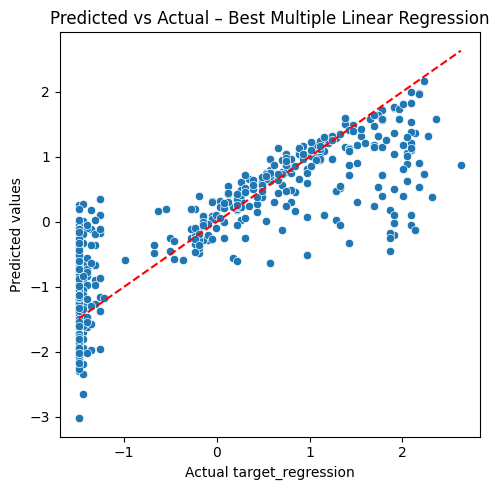

In [23]:
# Use the best-performing model (highest R¬≤)
best_model_features = reg_results.iloc[0]['Features']
lr_best = LinearRegression().fit(X_train[best_model_features], y_train)
y_pred_best = lr_best.predict(X_test[best_model_features])

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual ‚Äì Best Multiple Linear Regression")
plt.xlabel("Actual target_regression")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()


### Classification Modeling

In [24]:
# Ensure target columns exist
if 'target_class' not in df_clean.columns:
    df_clean['target_class'] = df_model['target_class']
if 'target_regression' not in df_clean.columns:
    df_clean['target_regression'] = df_model['target_regression']

# Coerce focus_factor (object) to numeric
df_clean['focus_factor'] = pd.to_numeric(df_clean['focus_factor'], errors='coerce')

# === Classification dataset ===
y_cls = df_clean['target_class']
X_cls = df_clean.drop(columns=['target_class','target_regression'], errors='ignore')

# Ensure all predictors are numeric and fill missing with medians
X_cls = X_cls.select_dtypes(include=np.number).fillna(X_cls.median(numeric_only=True))

print("X_cls shape:", X_cls.shape)
print("y_cls distribution:\n", y_cls.value_counts())

# Split with stratification if all classes have >1 record
if y_cls.value_counts().min() > 1:
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
    )
else:
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_cls, y_cls, test_size=0.2, random_state=42
    )


X_cls shape: (3000, 32)
y_cls distribution:
 target_class
class_93     1000
class_105    1000
class_112    1000
Name: count, dtype: int64


In [25]:

def evaluate_classifier(model, X_train, X_test, y_train, y_test, rng):
    model_name = type(model).__name__
    print(f"\n============================")
    print(f"üìä Model: {model_name}")
    print("============================\n")

    # --- 1Ô∏è‚É£ Holdout Evaluation ---
    model_fit = model.__class__(**model.get_params())
    model_fit.fit(X_train, y_train)
    preds = model_fit.predict(X_test)
    probs = model_fit.predict_proba(X_test) if hasattr(model_fit, "predict_proba") else None

    holdout_metrics = {
        "Accuracy": accuracy_score(y_test, preds),
        "Recall (macro)": recall_score(y_test, preds, average="macro"),
        "F1 (macro)": f1_score(y_test, preds, average="macro"),
        "ROC AUC (ovr)": roc_auc_score(pd.get_dummies(y_test), probs, multi_class="ovr") if probs is not None else np.nan
    }

    df_holdout = pd.DataFrame(holdout_metrics, index=[model_name])
    print("üìç Holdout Results:")
    display(df_holdout)

    # --- 2Ô∏è‚É£ 5-Fold Cross Validation ---
    skf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv5 = cross_validate(
        model, X_train, y_train,
        cv=skf5,
        scoring=["accuracy", "recall_macro", "f1_macro"],
        n_jobs=-1
    )

    df_cv5 = pd.DataFrame({
        "Accuracy": [cv5["test_accuracy"].mean()],
        "Recall (macro)": [cv5["test_recall_macro"].mean()],
        "F1 (macro)": [cv5["test_f1_macro"].mean()]
    }, index=[model_name])
    print("\nüìç 5-Fold Cross Validation:")
    display(df_cv5)

    # --- 3Ô∏è‚É£ 10-Fold Cross Validation ---
    skf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv10 = cross_validate(
        model, X_train, y_train,
        cv=skf10,
        scoring=["accuracy", "recall_macro", "f1_macro"],
        n_jobs=-1
    )

    df_cv10 = pd.DataFrame({
        "Accuracy": [cv10["test_accuracy"].mean()],
        "Recall (macro)": [cv10["test_recall_macro"].mean()],
        "F1 (macro)": [cv10["test_f1_macro"].mean()]
    }, index=[model_name])
    print("\nüìç 10-Fold Cross Validation:")
    display(df_cv10)

    # --- 4Ô∏è‚É£ Leave-One-Out Cross Validation (LOOCV) ---
    loo = LeaveOneOut()
    cvloo = cross_validate(
        model, X_train, y_train,
        cv=loo,
        scoring=["accuracy", "recall_macro", "f1_macro"]
    )

    df_loocv = pd.DataFrame({
        "Accuracy": [cvloo["test_accuracy"].mean()],
        "Recall (macro)": [cvloo["test_recall_macro"].mean()],
        "F1 (macro)": [cvloo["test_f1_macro"].mean()]
    }, index=[model_name])
    print("\nüìç Leave-One-Out Cross Validation (LOOCV):")
    display(df_loocv)

    # --- 5Ô∏è‚É£ Bootstrap Evaluation ---
    boot_metrics = {"Accuracy": [], "Recall (macro)": [], "F1 (macro)": []}
    for _ in range(100):
        idx = rng.integers(0, len(y_train), len(y_train))
        X_b = X_train.iloc[idx]
        y_b = y_train.iloc[idx]

        m_boot = model.__class__(**model.get_params())
        m_boot.fit(X_b, y_b)
        preds_b = m_boot.predict(X_b)
        boot_metrics["Accuracy"].append(accuracy_score(y_b, preds_b))
        boot_metrics["Recall (macro)"].append(recall_score(y_b, preds_b, average="macro"))
        boot_metrics["F1 (macro)"].append(f1_score(y_b, preds_b, average="macro"))

    df_boot = pd.DataFrame({
        "Accuracy": [np.mean(boot_metrics["Accuracy"])],
        "Recall (macro)": [np.mean(boot_metrics["Recall (macro)"])],
        "F1 (macro)": [np.mean(boot_metrics["F1 (macro)"])]
    }, index=[model_name])
    print("\nüìç Bootstrap Results:")
    display(df_boot)

    # Return all metrics as dict (for storage or summary table)
    return {
        "Model": model_name,
        "Holdout_Accuracy": holdout_metrics["Accuracy"],
        "Holdout_Recall": holdout_metrics["Recall (macro)"],
        "Holdout_F1": holdout_metrics["F1 (macro)"],
        "Holdout_ROC_AUC": holdout_metrics["ROC AUC (ovr)"],
        "CV5_Accuracy": df_cv5["Accuracy"].iloc[0],
        "CV5_Recall": df_cv5["Recall (macro)"].iloc[0],
        "CV5_F1": df_cv5["F1 (macro)"].iloc[0],
        "CV10_Accuracy": df_cv10["Accuracy"].iloc[0],
        "CV10_Recall": df_cv10["Recall (macro)"].iloc[0],
        "CV10_F1": df_cv10["F1 (macro)"].iloc[0],
        "LOOCV_Accuracy": df_loocv["Accuracy"].iloc[0],
        "LOOCV_Recall": df_loocv["Recall (macro)"].iloc[0],
        "LOOCV_F1": df_loocv["F1 (macro)"].iloc[0],
        "Bootstrap_Accuracy": df_boot["Accuracy"].iloc[0],
        "Bootstrap_Recall": df_boot["Recall (macro)"].iloc[0],
        "Bootstrap_F1": df_boot["F1 (macro)"].iloc[0]
    }


In [26]:
models = [
    LogisticRegression(max_iter=500, random_state=42),
    LDA(),
    QDA()
]

results = [
    evaluate_classifier(m, X_train_c, X_test_c, y_train_c, y_test_c, rng)
    for m in models
]



üìä Model: LogisticRegression

üìç Holdout Results:


Accuracy  Recall (macro)  F1 (macro)  ROC AUC (ovr)
LogisticRegression     0.785           0.785    0.783119       0.921779


üìç 5-Fold Cross Validation:


Accuracy  Recall (macro)  F1 (macro)
LogisticRegression  0.804583        0.804583    0.803666


üìç 10-Fold Cross Validation:


Accuracy  Recall (macro)  F1 (macro)
LogisticRegression   0.80125         0.80125    0.800203


üìç Leave-One-Out Cross Validation (LOOCV):


Accuracy  Recall (macro)  F1 (macro)
LogisticRegression    0.8075          0.8075      0.8075


üìç Bootstrap Results:


Accuracy  Recall (macro)  F1 (macro)
LogisticRegression   0.82125        0.821297    0.820827


üìä Model: LinearDiscriminantAnalysis

üìç Holdout Results:


Accuracy  Recall (macro)  F1 (macro)  \
LinearDiscriminantAnalysis      0.77            0.77    0.774397   

                            ROC AUC (ovr)  
LinearDiscriminantAnalysis       0.916267


üìç 5-Fold Cross Validation:


Accuracy  Recall (macro)  F1 (macro)
LinearDiscriminantAnalysis  0.792917        0.792917    0.796157


üìç 10-Fold Cross Validation:


Accuracy  Recall (macro)  F1 (macro)
LinearDiscriminantAnalysis  0.792917        0.792917     0.79582


üìç Leave-One-Out Cross Validation (LOOCV):


Accuracy  Recall (macro)  F1 (macro)
LinearDiscriminantAnalysis  0.791667        0.791667    0.791667


üìç Bootstrap Results:


Accuracy  Recall (macro)  F1 (macro)
LinearDiscriminantAnalysis  0.805821        0.805607    0.808574


üìä Model: QuadraticDiscriminantAnalysis

üìç Holdout Results:


Accuracy  Recall (macro)  F1 (macro)  \
QuadraticDiscriminantAnalysis  0.703333        0.703333    0.701365   

                               ROC AUC (ovr)  
QuadraticDiscriminantAnalysis       0.869942


üìç 5-Fold Cross Validation:


Accuracy  Recall (macro)  F1 (macro)
QuadraticDiscriminantAnalysis  0.715833        0.715833     0.70953


üìç 10-Fold Cross Validation:


Accuracy  Recall (macro)  F1 (macro)
QuadraticDiscriminantAnalysis      0.72            0.72    0.715082


üìç Leave-One-Out Cross Validation (LOOCV):


Accuracy  Recall (macro)  F1 (macro)
QuadraticDiscriminantAnalysis   0.70125         0.70125     0.70125


üìç Bootstrap Results:


Accuracy  Recall (macro)  F1 (macro)
QuadraticDiscriminantAnalysis  0.738354        0.738185    0.736805

Alpha: 0.05
R¬≤ (teste): 0.7498
MAE (teste): 0.4392
RMSE (teste): 0.6365

=== Features selecionadas pelo LASSO ===


Feature  Coefficient
12  artists_avg_popularity     0.659703
6               album_freq    -0.348026

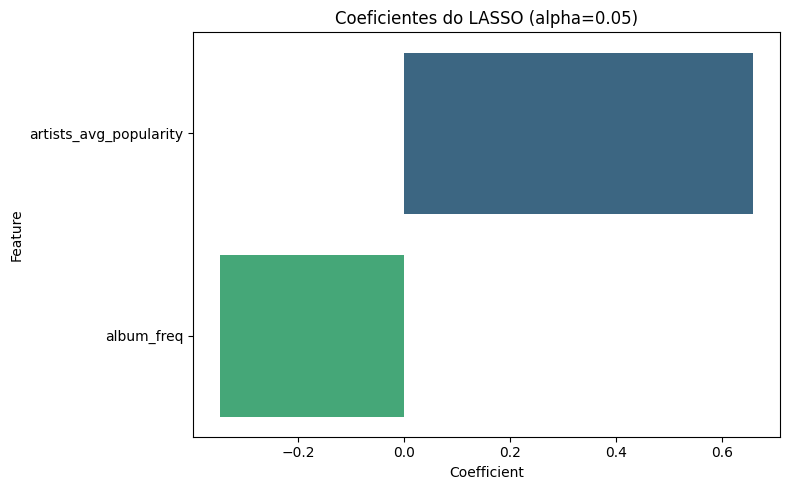

In [27]:
# 2. Aplicar LASSO com alpha manual

# Definir alpha manualmente (ajuste se necess√°rio)
alpha_value = 0.05

lasso = Lasso(alpha=alpha_value, random_state=42)
lasso.fit(X_train, y_train)


# 3. Avaliar desempenho no conjunto de teste

y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Alpha: {alpha_value}")
print(f"R¬≤ (teste): {r2:.4f}")
print(f"MAE (teste): {mae:.4f}")
print(f"RMSE (teste): {rmse:.4f}")

# ----------------------------------------------------------
# 4. Selecionar features com coeficiente != 0
# ----------------------------------------------------------

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
selected_features = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

print("\n=== Features selecionadas pelo LASSO ===")
display(selected_features)

# ----------------------------------------------------------
# 5. Visualiza√ß√£o dos coeficientes
# ----------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=selected_features, palette='viridis')
plt.title(f'Coeficientes do LASSO (alpha={alpha_value})')
plt.tight_layout()
plt.show()



In [28]:
df_clean['target_regression'].describe()

count    3000.000000
mean       -0.348556
std         1.290190
min        -1.490205
25%        -1.490205
50%        -1.355706
75%         0.706625
max         2.813789
Name: target_regression, dtype: float64

Modelo        R¬≤       MAE      RMSE  N¬∫ Features
0         Lasso (alpha=0.05)  0.749830  0.439216  0.636529            2
1  Linear Regression (todas)  0.753703  0.440693  0.631583           31

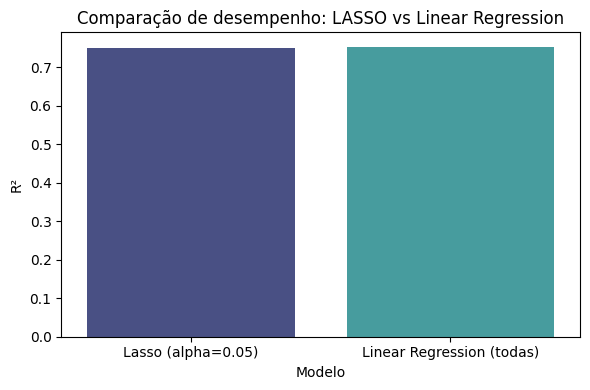

In [29]:
# ----------------------------------------------------------
# 6. Compara√ß√£o com modelo Linear Regression (todas as features)
# ----------------------------------------------------------

# Modelo linear completo
lr_full = LinearRegression()
lr_full.fit(X_train, y_train)
y_pred_lr = lr_full.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Compara√ß√£o direta
comparison = pd.DataFrame({
    'Modelo': ['Lasso (alpha=0.05)', 'Linear Regression (todas)'],
    'R¬≤': [r2, r2_lr],
    'MAE': [mae, mae_lr],
    'RMSE': [rmse, rmse_lr],
    'N¬∫ Features': [len(selected_features), X.shape[1]]
})

display(comparison)

# Visualiza√ß√£o da compara√ß√£o
plt.figure(figsize=(6,4))
sns.barplot(x='Modelo', y='R¬≤', data=comparison, palette='mako')
plt.title('Compara√ß√£o de desempenho: LASSO vs Linear Regression')
plt.tight_layout()
plt.show()
